In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [5]:
df=pd.read_csv('C://Users//Vedaditya//Desktop//AI&ML//Price of laptop prediction model//cleaned_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.shape

(1303, 12)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df['Ram'].str.replace('GB', '')

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [7]:
df['Weight'].str.replace('kg', '')

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1303, dtype: object

In [8]:
#We gave to change the object type of the columns to int or float
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False).astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False).astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [20]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Vedaditya\AppData\Local\Temp\ipykernel_39532\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

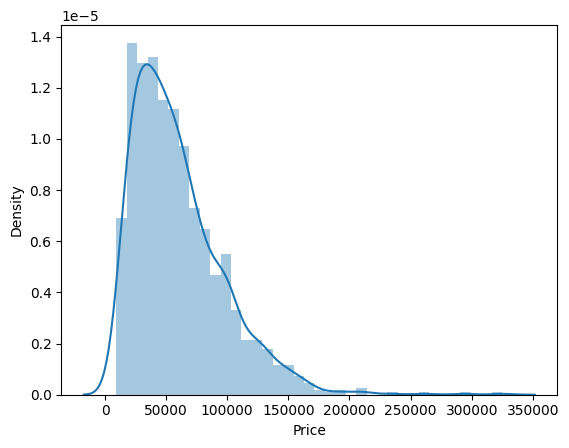

In [22]:
sns.distplot(df['Price'])

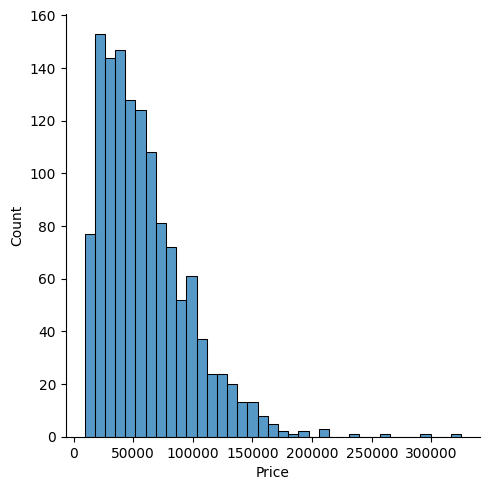

In [24]:
sns.displot(df['Price'])

<Axes: ylabel='Price'>

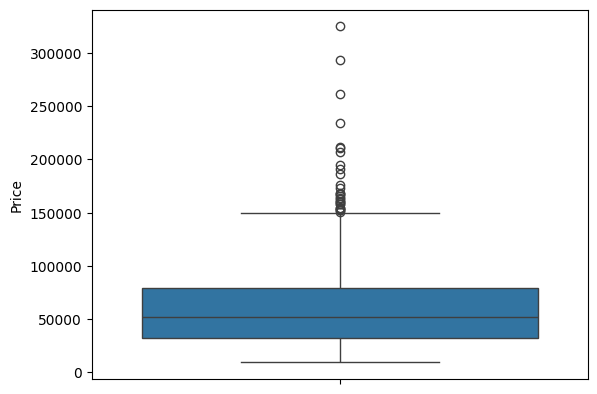

In [25]:
sns.boxplot(df['Price'])

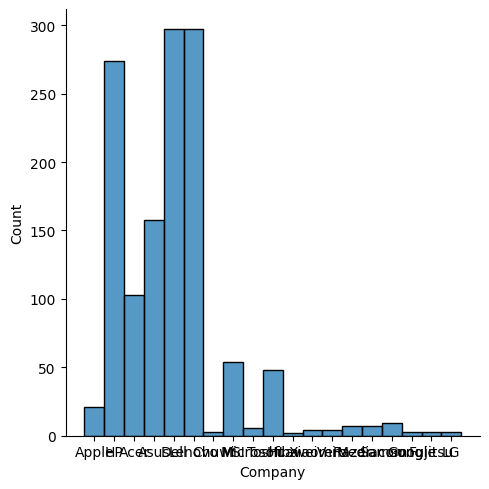

In [27]:
sns.displot(df['Company'])

<Axes: xlabel='Company'>

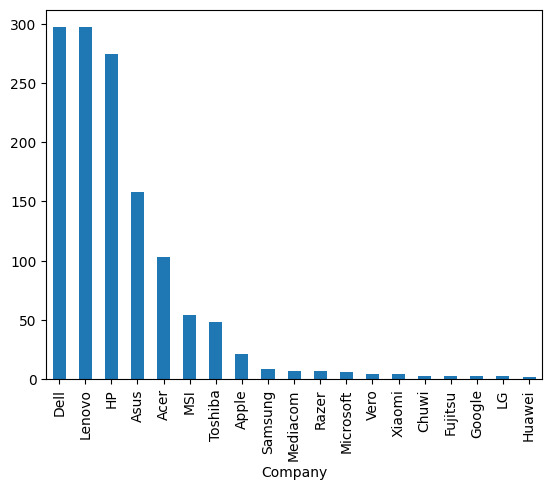

In [33]:
df['Company'].value_counts().plot(kind='bar')

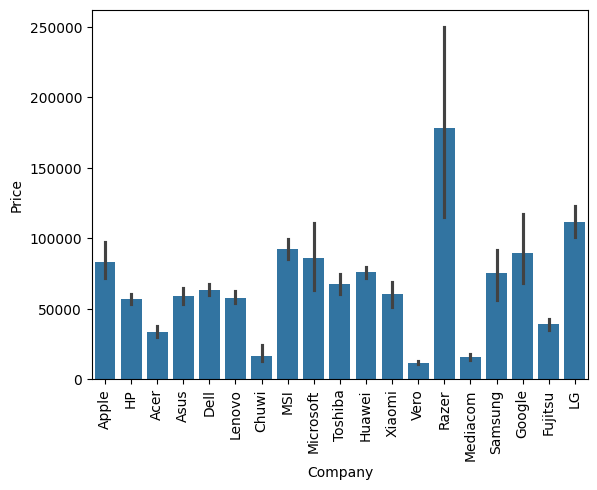

In [34]:
sns.barplot(x='Company', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='TypeName'>

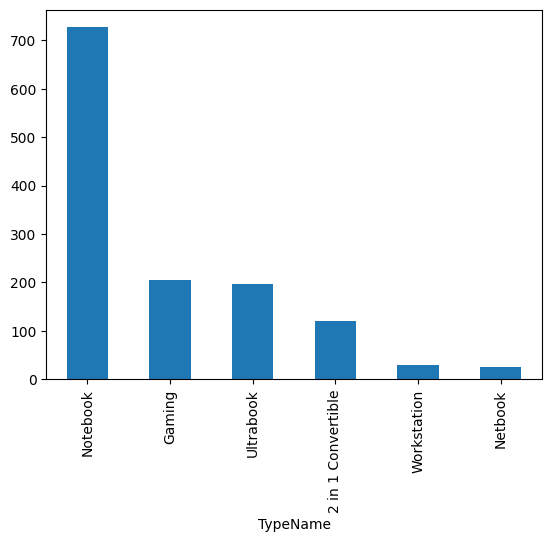

In [36]:
df['TypeName'].value_counts().plot(kind='bar')

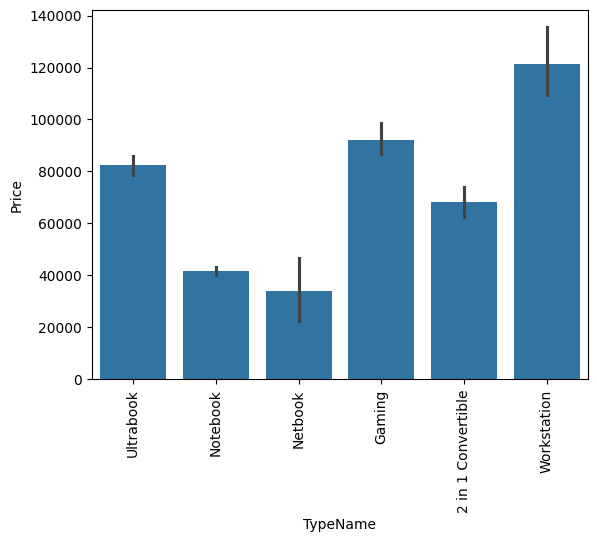

In [38]:
sns.barplot(x='TypeName', y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

C:\Users\Vedaditya\AppData\Local\Temp\ipykernel_39532\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

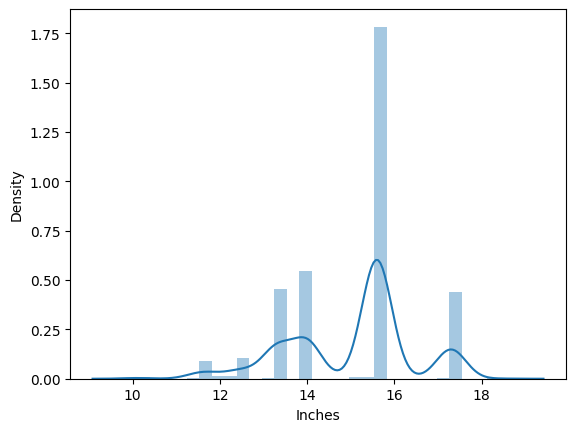

In [40]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

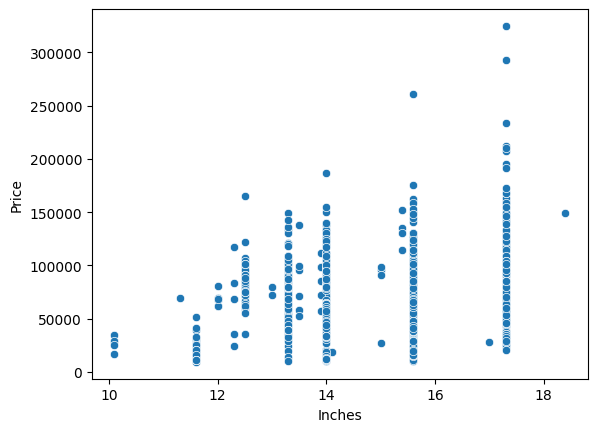

In [41]:
sns.scatterplot(x='Inches',y='Price',data=df)

In [42]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [9]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' or 'touch screen' in x.lower() else 0)

In [10]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1


In [11]:
df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
388,388,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.000,113752.8000,1
766,766,Asus,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.800,25059.7152,1
924,924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.370,97236.0000,1
487,487,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.060,101178.7200,1
430,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.150,14332.3200,1
818,818,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.360,133467.4656,1
457,457,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core M m3-7Y30 2.2GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252,52693.9200,1
519,519,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX1050 Ti,Windows 10,3.000,80133.1200,1
1180,1180,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.360,87219.3600,1
1159,1159,HP,2 in 1 Convertible,13.3,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.480,108744.4800,1


<Axes: xlabel='Touchscreen'>

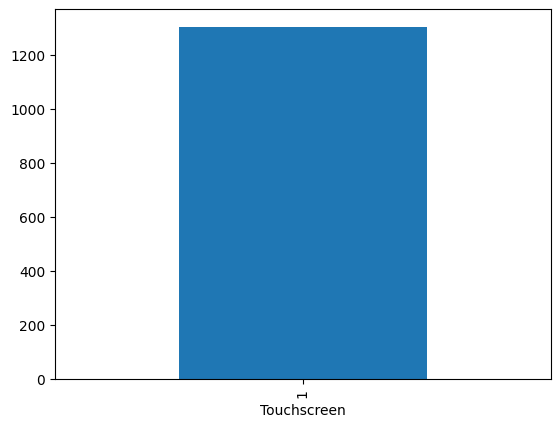

In [12]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [15]:
if ('touchscreen' or 'touchscreen') in df['ScreenResolution'].str.lower():
    df['Touchscreen'] = 1  
else:
    df['Touchscreen'] = 0

In [17]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

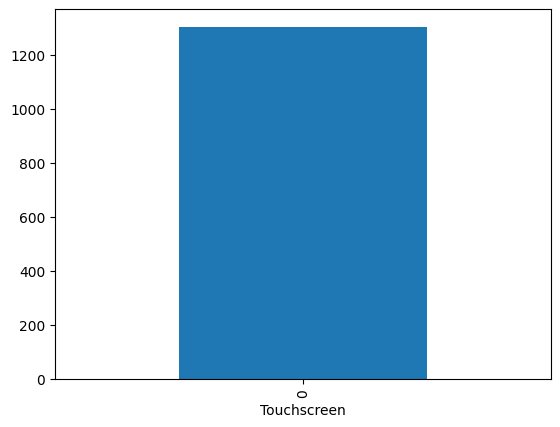

In [18]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [19]:
if ('touchscreen' or 'touchscreen') in df['ScreenResolution']:
    df['Touchscreen'] = 1  
else:
    df['Touchscreen'] = 0

<Axes: xlabel='Touchscreen'>

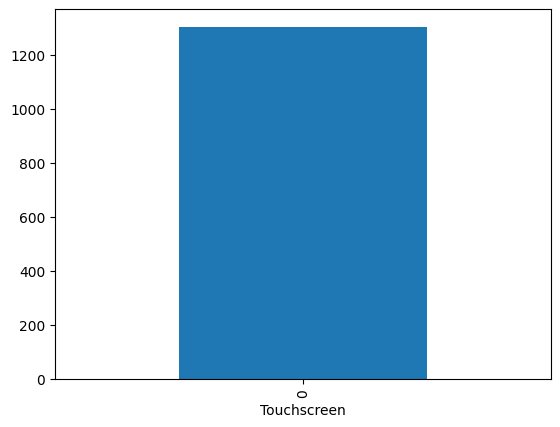

In [20]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [23]:
if 'Touchscreen' in df['ScreenResolution']:
    df['Touchscreen'] = 1
else:
    df['Touchscreen'] = 0

In [25]:
df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
320,320,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,68837.7600,0
1062,1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows 10,2.25,29783.5200,0
884,884,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,0
1149,1149,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.27,124621.9200,0
611,611,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,46833.6528,0
1064,1064,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,102777.1200,0
1237,1237,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,2.24,39267.3600,0
690,690,Acer,Notebook,14.0,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,19980.0000,0
852,852,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,46087.2000,0
1297,1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0


In [38]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


In [28]:
df.sample(10)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
274,274,Toshiba,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,8,500GB HDD,Nvidia GeForce 930M,Windows 10,2.20,43263.3600,0
808,808,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,89457.1200,0
305,305,Lenovo,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,No OS,2.20,19180.2672,0
1024,1024,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,500GB HDD,Intel HD Graphics 520,Windows 10,2.09,55754.3232,0
1285,1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1
136,136,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,No OS,1.90,13445.7408,0
941,941,Asus,Notebook,17.3,1600x900,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,28238.4000,0
621,621,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,78055.2000,0
939,939,Dell,Gaming,17.3,2560x1440,Intel Core i7 6820HK 2.7GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.36,146946.2400,0
735,735,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,41505.1200,0


<Axes: xlabel='Touchscreen'>

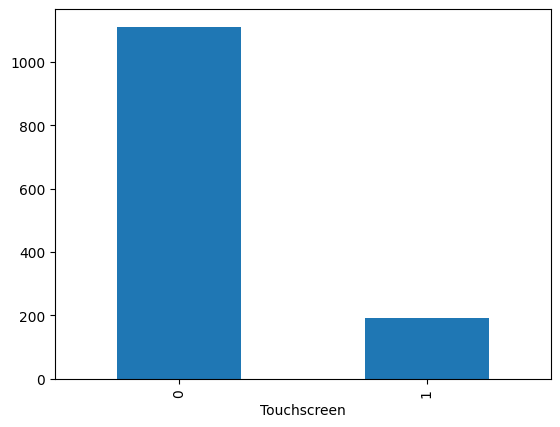

In [39]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [35]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<Axes: xlabel='IPS'>

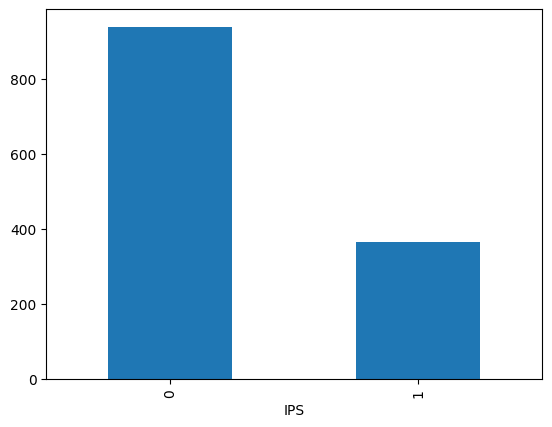

In [37]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

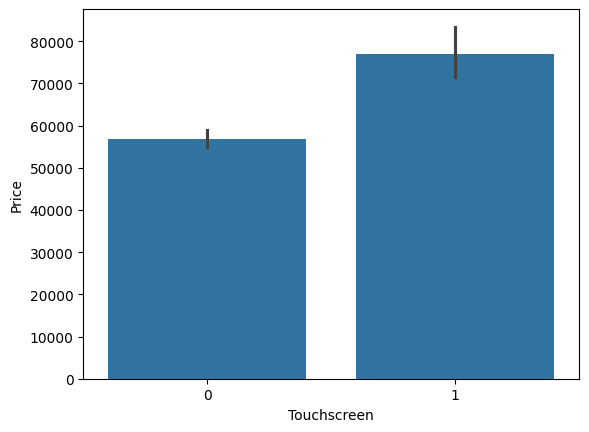

In [42]:
sns.barplot(x='Touchscreen', y='Price', data=df)

<Axes: xlabel='IPS', ylabel='Price'>

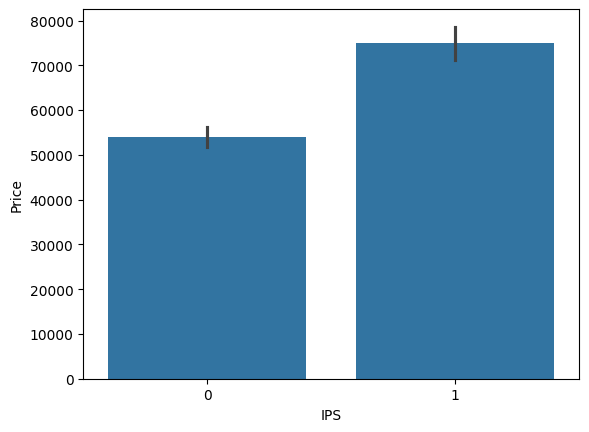

In [43]:
sns.barplot(x='IPS', y='Price', data=df)

In [ ]:
import re

# Generalized function to extract screen resolution features
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')
#r'(\d{3,4}x\d{3,4})' is the regex pattern, where:

#\d{3,4} matches a number with 3 or 4 digits (like 1920, 3840)

#x is the literal 'x' character

#So \d{3,4}x\d{3,4} matches strings like 1366x768, 1920x1080, 3840x2160


In [47]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600


In [55]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [56]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560x1600


In [58]:
df['Resolution'].value_counts()

Resolution
1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2304x1440      6
2560x1600      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [62]:
df.corr()['Price'].sort_values(ascending=False)


ValueError: could not convert string to float: 'Apple'

In [ ]:
df['Touchscreen']=df['Touchscreen'].astype(int)
df['IPS']=df['IPS'].astype(int)
df['Company'] = df['Company'].astype('category')

In [64]:
df[['X_res', 'Y_res']] = df['Resolution'].str.split('x', expand=True).astype(int)


In [65]:
print(df[['X_res', 'Y_res']].head())


   X_res  Y_res
0   2560   1600
1   1440    900
2   1920   1080
3   2880   1800
4   2560   1600


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Resolution        1303 non-null   object 
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory 

In [67]:
df.drop(columns=['Resolution'], inplace=True)

In [71]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

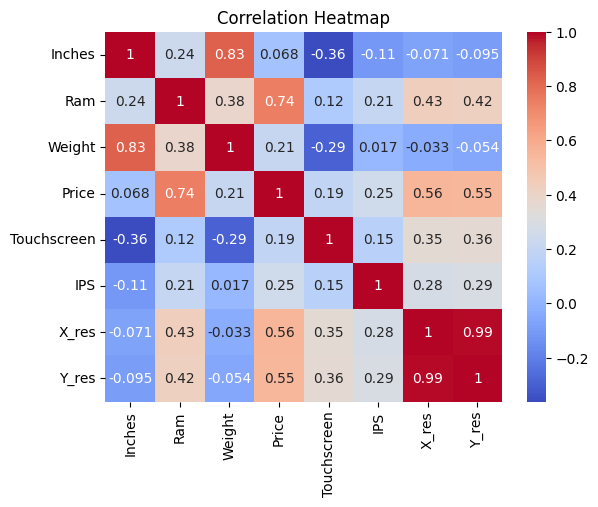

In [69]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#We calculate the PPI Pixel Per Inch for each laptop which is a metric used for laptops.
df['PPI'] = np.sqrt(df['X_res']**2 + df['Y_res']**2) / df['Inches']
#Above is the formula to calculate PPI 

In [74]:
df['PPI']=df['PPI'].astype(float)

In [76]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['ScreenResolution'], inplace=True)


In [78]:
df.drop(columns=['Inches','X_res','Y_res'], inplace=True)

In [79]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [80]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [81]:
def categorize_cpu(text):
    text = text.lower()
    if "intel core i7" in text:
        return "Intel Core i7"
    elif "intel core i5" in text:
        return "Intel Core i5"
    elif "intel core i3" in text:
        return "Intel Core i3"
    elif "celeron" in text:
        return "Intel Celeron"
    elif "pentium" in text:
        return "Intel Pentium"
    elif "ryzen" in text:
        return "AMD Ryzen"
    elif "amd a" in text:
        return "AMD A Series"
    else:
        return "Other"

df['Cpu_brand'] = df['Cpu'].apply(categorize_cpu)


<Axes: xlabel='Cpu_brand'>

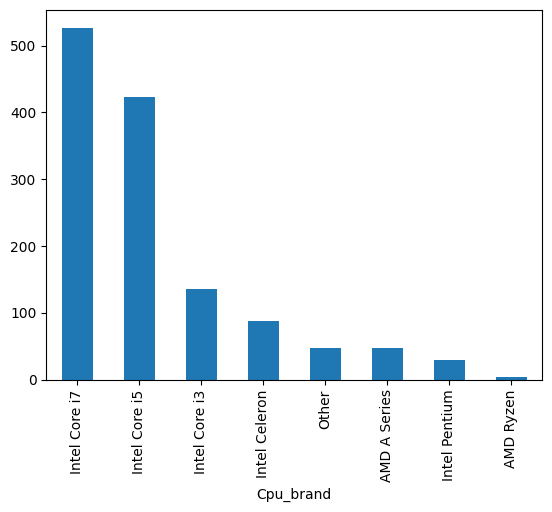

In [83]:
df['Cpu_brand'].value_counts().plot(kind='bar')

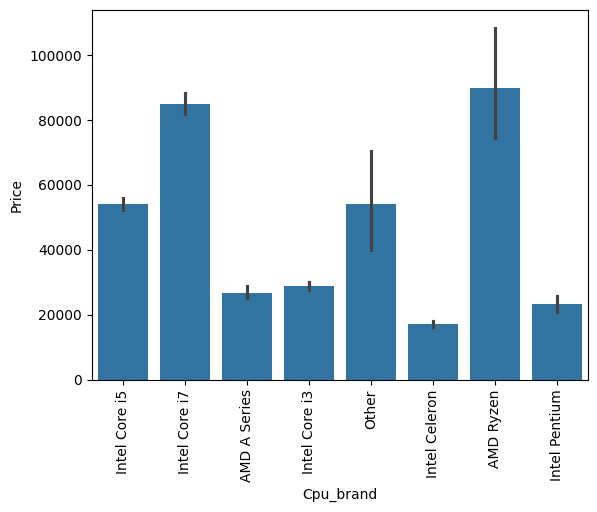

In [89]:
sns.barplot(x='Cpu_brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

In [94]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand
60,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.7200,0,0,127.335675,Intel Core i7
325,Lenovo,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,15557.7600,0,0,111.935204,Intel Celeron
145,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.25,58554.7200,0,0,157.350512,Intel Core i7
363,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,34045.9200,0,0,141.211998,Intel Core i5
778,Razer,Gaming,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.7200,0,0,157.350512,Intel Core i7
1086,HP,Workstation,Intel Core i7 6500U 2.5GHz,8,256GB SSD,AMD FirePro W4190M,Windows 7,1.90,79653.6000,0,0,141.211998,Intel Core i7
367,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.40,43103.5200,0,1,141.211998,Intel Core i5
1119,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0,0,127.335675,Intel Core i7
483,Chuwi,Notebook,Intel Atom x5-Z8350 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13261.3920,0,0,141.211998,Other
795,Lenovo,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.42,124142.4000,1,1,209.800683,Intel Core i5


In [95]:
def categorize_cpu_updated(text):
    text = text.lower()
    if "intel core i7" in text:
        return "Intel Core i7"
    elif "intel core i5" in text:
        return "Intel Core i5"
    elif "intel core i3" in text:
        return "Intel Core i3"
    elif "celeron" in text:
        return "Intel Celeron"
    elif "pentium" in text:
        return "Intel Pentium"
    elif "ryzen" in text or "amd a" in text:
        return "AMD CPU"
    else:
        return "Other"

# Apply the categorization
df['Cpu_brand'] = df['Cpu'].apply(categorize_cpu_updated)

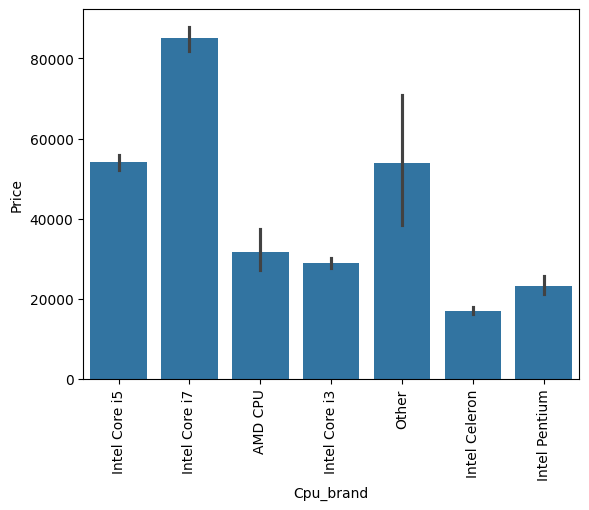

In [97]:
sns.barplot(x='Cpu_brand', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

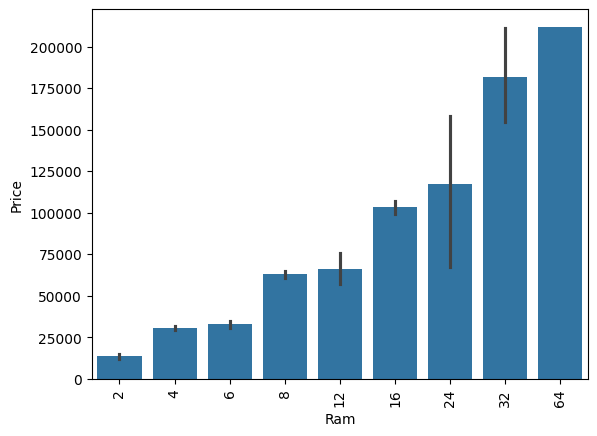

In [98]:
sns.barplot(x='Ram', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

In [99]:
df['Memory'] = df['Memory'].str.replace('1TB', '1024GB').str.replace('2TB', '2048GB')


In [100]:
def convert_memory(val):
    val = val.replace(' ', '').upper()
    replacements = {'TB': '*1024', 'GB': '', 'SSD': ' SSD', 'HDD': ' HDD', 'FLASHSTORAGE': ' Flash', 'HYBRID': ' Hybrid'}
    for k, v in replacements.items():
        val = val.replace(k, v)
    return val

df['Memory'] = df['Memory'].astype(str).apply(convert_memory)

# Extracting parts
df['SSD'] = df['Memory'].str.extract(r'(\d+)\s*SSD').fillna(0).astype(int)
df['HDD'] = df['Memory'].str.extract(r'(\d+)\s*HDD').fillna(0).astype(int)
df['Flash'] = df['Memory'].str.extract(r'(\d+)\s*Flash').fillna(0).astype(int)
df['Hybrid'] = df['Memory'].str.extract(r'(\d+)\s*Hybrid').fillna(0).astype(int)

In [102]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,SSD,HDD,Flash,Hybrid
661,Lenovo,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,500 HDD,Intel HD Graphics 500,Windows 10,2.20,22324.3200,0,0,100.454670,Intel Celeron,0,500,0,0
206,Dell,Notebook,Intel Core i3 7100U 2.4GHz,6,1024 HDD,Intel HD Graphics 620,Windows 10,2.30,23389.9200,1,0,100.454670,Intel Core i3,0,1024,0,0
655,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,500 HDD,Intel HD Graphics 620,Windows 10,2.00,56689.9200,0,1,141.211998,Intel Core i5,0,500,0,0
925,Dell,Notebook,Intel Core i5 6200U 2.3GHz,4,500 HDD,Intel HD Graphics 520,Windows 10,1.95,38889.0720,0,0,100.454670,Intel Core i5,0,500,0,0
279,Lenovo,Notebook,Intel Core i7 8550U 1.8GHz,8,2048 HDD,Nvidia GeForce MX150,No OS,2.80,45234.7200,0,0,127.335675,Intel Core i7,0,2048,0,0
442,Lenovo,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,76137.1200,0,1,176.232574,Intel Core i5,256,0,0,0
1090,Dell,Notebook,Intel Pentium Quad Core N3700 1.6GHz,4,500 HDD,Intel HD Graphics,Linux,2.20,20965.1472,0,0,100.454670,Intel Pentium,0,500,0,0
308,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,8,128 SSD+1024 HDD,Nvidia GeForce 940MX,Windows 10,2.30,43636.3200,0,0,141.211998,Intel Core i5,128,1024,0,0
1210,Apple,Ultrabook,Intel Core M 1.2GHz,8,512 Flash,Intel HD Graphics 515,Mac OS X,0.92,68145.1200,0,1,226.415547,Other,0,0,512,0
101,HP,Notebook,AMD E-Series E2-9000e 1.5GHz,4,500 HDD,AMD Radeon R2,Windows 10,2.10,18594.7200,0,0,141.211998,Other,0,500,0,0


In [104]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
SSD            0.675986
HDD           -0.094082
Flash         -0.040511
Hybrid         0.008011
Name: Price, dtype: float64

In [105]:
#WE can see how Flash drive and Hydbrid have a neglible impact on the price of the laptop.
#So we can drop these columns.
df.drop(columns=['Memory', 'Flash', 'Hybrid'], inplace=True)

In [ ]:

df.drop(columns='Cpu',inplace=True)

In [111]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [112]:

df['Gpu'] = df['Gpu'].astype(str).str.upper()

# Extract GPU brand/category based on the keywords
def categorize_gpu(gpu_name):
    if 'NVIDIA' in gpu_name:
        return 'Nvidia GPU'
    elif 'AMD' in gpu_name:
        return 'AMD GPU'
    elif 'INTEL' in gpu_name:
        return 'Intel GPU'
    else:
        return 'Other'

# Apply the function to create a new column
df['Gpu_Brand'] = df['Gpu'].apply(categorize_gpu)


In [113]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,SSD,HDD,Gpu_Brand
0,Apple,Ultrabook,8,INTEL IRIS PLUS GRAPHICS 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel GPU
1,Apple,Ultrabook,8,INTEL HD GRAPHICS 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel GPU
2,HP,Notebook,8,INTEL HD GRAPHICS 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel GPU
3,Apple,Ultrabook,16,AMD RADEON PRO 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD GPU
4,Apple,Ultrabook,8,INTEL IRIS PLUS GRAPHICS 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel GPU


<Axes: xlabel='Gpu_Brand', ylabel='Price'>

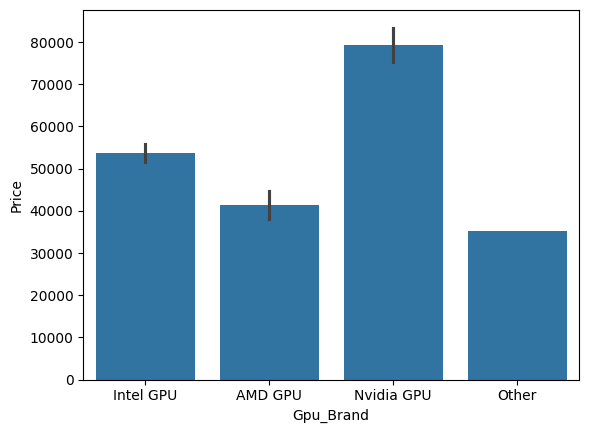

In [114]:
sns.barplot(x='Gpu_Brand', y='Price', data=df)

In [115]:
df.drop(columns='Gpu', inplace=True)

In [117]:
df['OpSys'] = df['OpSys'].astype(str).str.upper()

def categorize_os(os):
    if 'WINDOWS' in os:
        return 'Windows'
    elif 'MAC' in os or 'MACOS' in os:
        return 'Mac OS'
    elif 'LINUX' in os:
        return 'Linux'
    elif 'CHROME' in os:
        return 'Chrome OS'
    elif 'DOS' in os or 'NO OS' in os or 'UNKNOWN' in os:
        return 'No OS'
    else:
        return 'Other'

# Apply the function 
df['OS_Category'] = df['OpSys'].apply(categorize_os)


In [118]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,SSD,HDD,Gpu_Brand,OS_Category
0,Apple,Ultrabook,8,MACOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel GPU,Mac OS
1,Apple,Ultrabook,8,MACOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel GPU,Mac OS
2,HP,Notebook,8,NO OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel GPU,No OS
3,Apple,Ultrabook,16,MACOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD GPU,Mac OS
4,Apple,Ultrabook,8,MACOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel GPU,Mac OS


In [119]:
df.drop(columns='OpSys', inplace=True)

<Axes: xlabel='OS_Category', ylabel='Price'>

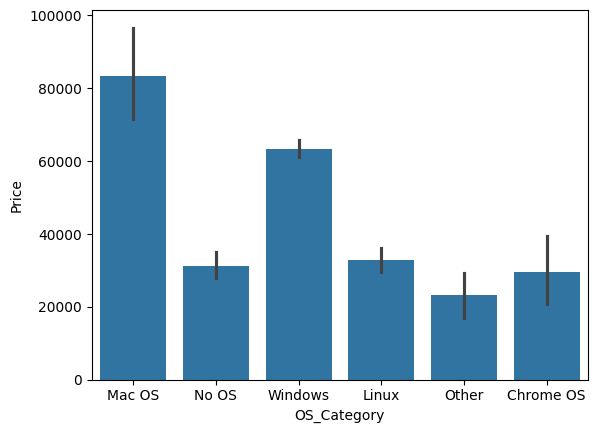

In [120]:
sns.barplot(x='OS_Category', y='Price', data=df)

C:\Users\Vedaditya\AppData\Local\Temp\ipykernel_29088\3457287985.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

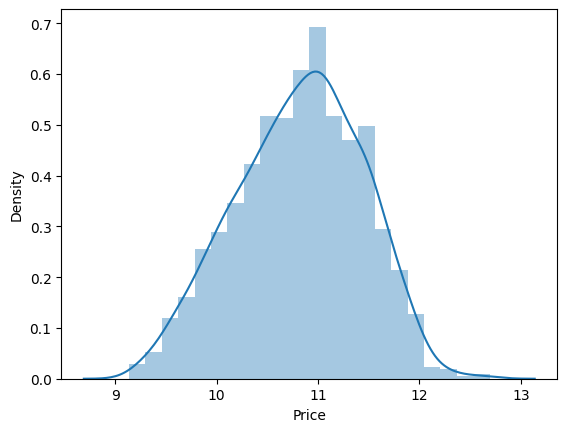

In [121]:
# By taking the logarithm we normalize the distribution increasing the R2 score
sns.distplot(np.log(df['Price']))

In [122]:
X = df.drop(columns=['Price'])
Y = np.log(df['Price'])

In [123]:
X


,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,SSD,HDD,Gpu_Brand,OS_Category
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel GPU,Mac OS
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel GPU,Mac OS
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel GPU,No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD GPU,Mac OS
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel GPU,Mac OS
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128,0,Intel GPU,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512,0,Intel GPU,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Intel Celeron,0,0,Intel GPU,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0,1024,AMD GPU,Windows


In [124]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [126]:
#The proportion of the dataset to include in the test split.
#20% of the data will be used for testing when test_size value is 0.2
#For random state It doesn’t matter what number you use. What matters is you use one, so results are reproducible.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [127]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,SSD,HDD,Gpu_Brand,OS_Category
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,128,0,Intel GPU,Windows
699,HP,Notebook,4,2.10,0,1,141.211998,Intel Core i7,0,500,AMD GPU,Windows
419,Lenovo,Ultrabook,8,1.75,0,1,157.350512,Intel Core i7,256,0,AMD GPU,Windows
997,Acer,Notebook,4,2.40,0,0,100.454670,Intel Pentium,0,500,Intel GPU,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,1,1,158.482530,Intel Core i5,256,0,Intel GPU,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,0,500,Nvidia GPU,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,512,0,Nvidia GPU,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD CPU,0,1024,AMD GPU,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,0,2048,Nvidia GPU,No OS


In [129]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,SSD,HDD,Gpu_Brand,OS_Category
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,0,500,Intel GPU,Windows
556,Mediacom,Notebook,4,1.35,0,1,165.632118,Other,0,0,Intel GPU,Windows
693,Lenovo,2 in 1 Convertible,8,1.42,1,0,209.800683,Intel Core i7,256,0,Intel GPU,Windows
387,Dell,Workstation,8,2.23,0,0,141.211998,Intel Core i5,0,500,AMD GPU,Windows
781,Asus,Gaming,16,4.30,0,1,127.335675,Intel Core i7,256,1024,Nvidia GPU,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
697,Asus,2 in 1 Convertible,4,1.20,1,0,176.232574,Other,0,0,Intel GPU,Chrome OS
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD CPU,0,500,AMD GPU,No OS
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,256,0,Intel GPU,Windows
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0,1024,Intel GPU,Windows


In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [133]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [132]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.1/150.0 MB 23.1 MB/s eta 0:00:07
   -- ------------------------------------- 8.4/150.0 MB 24.7 MB/s eta 0:00:06
   --- ------------------------------------ 12.6/150.0 MB 22.5 MB/s eta 0:00:07
   --- ------------------------------------ 14.7/150.0 MB 18.8 MB/s eta 0:00:08
   ----- ---------------------------------- 20.2/150.0 MB 20.6 MB/s eta 0:00:07
   ------ --------------------------------- 24.1/150.0 MB 20.6 MB/s eta 0:00:07
   ------- -------------------------------- 28.3/150.0 MB 20.4 MB/s eta 0:00:06
   -------- ------------------------------- 32.5/150.0 MB 20.2 MB/s eta 0:00:06
   --------- ------------------------------ 36.4/150.0 MB 20.1 MB/s eta 0:00:06
   ---------- ----------------------------- 40.4/150.0 MB 20.1 MB/s eta 0:00:06
   ----------- ---------------------------- 44.6/150.0 MB 20.0 MB/s eta 0:00:06
   ------------ --------------------------- 48.5/15

LINEAR REGRESSION

In [136]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8149309295334763
MAE 0.20924688207981382


RIDGE REGRESSON 

In [143]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.81833346045575
MAE 0.20880946084555035


Lasso Regression

In [139]:
df.to_csv('cleaned_laptop_data1.csv', index=False)


DECISION TREES


In [150]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8351914692767918
MAE 0.18904895417546336


KNN 

In [152]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))

R2 score 0.8296384191887655
MAE 0.19698057116951806


RANDOM FOREST (BEST SCORE)

In [156]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,y_pred))
print('MAE',mean_absolute_error(Y_test,y_pred))


R2 score 0.8902272064965698
MAE 0.15704348934566315


RANDOM FOREST TUNING HYPERPARAMETERS USING GRIDSEARCH CV

In [154]:

from sklearn.model_selection import GridSearchCV

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(random_state=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    'step2__n_estimators': [100, 200],
    'step2__max_depth': [10, 15, 20],
    'step2__max_features': [0.5, 0.75],
    'step2__max_samples': [0.5, 0.75]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train, Y_train)

y_pred = grid.best_estimator_.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Best CV R2 Score:", grid.best_score_)
print("R2 Score on Test:", r2_score(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Vedaditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'step2__max_depth': 10, 'step2__max_features': 0.5, 'step2__max_samples': 0.5, 'step2__n_estimators': 100}
Best CV R2 Score: nan
R2 Score on Test: 0.8836064795061004
MAE: 0.16353249434307165


In [155]:
from sklearn.model_selection import train_test_split, GridSearchCV

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(random_state=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    'step2__n_estimators': [100, 200],
    'step2__max_depth': [10, 15, 20],
    'step2__max_features': [0.5, 0.75],
    'step2__max_samples': [0.5, 0.75]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train, Y_train)

y_pred = grid.best_estimator_.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Best CV R2 Score:", grid.best_score_)
print("R2 Score on Test:", r2_score(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\Vedaditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'step2__max_depth': 10, 'step2__max_features': 0.5, 'step2__max_samples': 0.5, 'step2__n_estimators': 100}
Best CV R2 Score: nan
R2 Score on Test: 0.8836064795061004
MAE: 0.16353249434307165


EXPORTING THE MODEL

In [157]:
import pickle 
pickle.dump(df,open('laptop_price_model.pkl', 'wb'))
pickle.dump(pipe,open('pipe.pkl', 'wb'))

In [1]:
df.head()


NameError: name 'df' is not defined